In [1]:
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen
from csv import reader
import numpy as np
from deepface.DeepFace import analyze
from deepface.DeepFace import detectFace

In [2]:
cv2.__version__

'4.5.5'

In [3]:
def show_image(img, color='gray'):
    cvtcode = {
        'rgb' : cv2.COLOR_BGR2RGB,
        'gray': cv2.COLOR_BGR2GRAY
    }
    cmap = {
        'rgb' : None,
        'gray': 'gray'
    }
    convert_img = cv2.cvtColor(img, cvtcode.get(color, cv2.COLOR_BGR2GRAY))
    plt.imshow(convert_img,cmap=cmap.get(color, 'gray'))

In [4]:
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

In [5]:
def crop_image(image, bounding_box):
    x, y, w, h = bounding_box[0]
    img_cropped = image[y:y + h, x:x + w]
    return img_cropped

In [6]:
def image_detection(img):
    gray_img = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    face_bb = face_cascade.detectMultiScale(gray_img, 1.1, 4)
    if len(face_bb) == 0:
        return None
    crop_img = crop_image(img, face_bb)
    return crop_img
    

In [7]:
def face_expression(img):
    analysis = analyze(image, actions = ["emotion","dominant_emotion"], detector_backend='mtcnn',)
    print(analysis)
    return analysis

In [9]:
def image_expression_prediction(img):
    crop_face = image_detection(img)
    if crop_face is None:
        return None
    analysis = face_expression(crop_face)
    return analysis

In [15]:
image = url_to_image("https://firebasestorage.googleapis.com/v0/b/ppm-pegasus.appspot.com/o/images%2F04920201207155708796%2FselfPhoto.png?alt=media&token=3229a1aa-0b53-4edc-ad1f-4a4e2f360971")


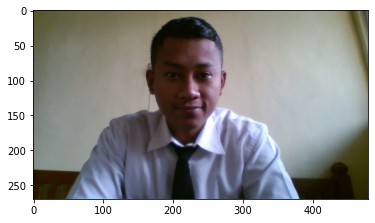

In [16]:
show_image(image, 'rgb')

In [17]:
analysis = image_expression_prediction(image)


Action: dominant_emotion: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

{'emotion': {'angry': 0.05411361084624296, 'disgust': 4.891064911513086e-06, 'fear': 0.2707449880686395, 'happy': 5.45990499615103, 'sad': 25.03395825826873, 'surprise': 0.0033203528961190817, 'neutral': 69.1779535518857}, 'dominant_emotion': 'neutral', 'region': {'x': 173, 'y': 36, 'w': 97, 'h': 135}}
